In [1]:
from gnn_boundary.datasets import *
from gnn_boundary.models import *
from gnn_boundary.utils import *
from gnn_boundary.criteria import *
from gnn_boundary.regularizations import *
from gnn_boundary import Trainer, Evaluator, GraphSampler

import shelve
import torch
import numpy as np

from DatasetWrapper import *
import os
import inspect
import sys

C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from gnn_boundary.models.linear_gcn_classifier import *

In [3]:
import torch
from tqdm.auto import trange

In [4]:
sys.path.append('../../')
import utility_functions

## Red Ratio Dataset


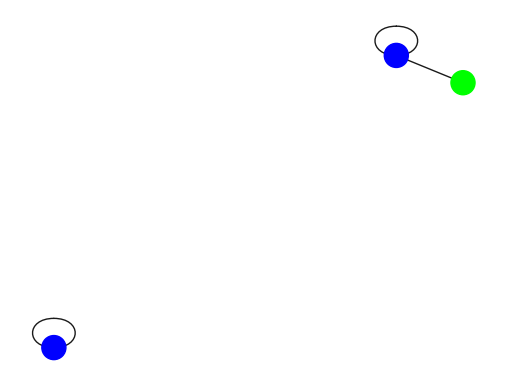

In [5]:
from graph_generation import RedRatioGraphs
redRatioGraphs = RedRatioGraphs.RedRatioGraphs(2000)#.getDataset()
dataset = redRatioGraphs.getDataset()

utility_functions.printGraph(dataset[0])

In [6]:



red_dataset = DatasetWrapper(dataset, num_cls = 2, name = "red_ratio")
red_dataset.y = red_dataset.y.long()
red_train, red_val = red_dataset.train_test_split(k=5)
red_model = LinearGCNClassifier(3,2,16)

In [7]:
for epoch in trange(10):
    train_loss = red_train.model_fit(red_model, lr=0.05)
    train_metrics = red_train.model_evaluate(red_model)
    val_metrics = red_val.model_evaluate(red_model)
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
 10%|█         | 1/10 [00:01<00:12,  1.42s/it]

Epoch: 000, Train Loss: 0.0779, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 20%|██        | 2/10 [00:02<00:09,  1.21s/it]

Epoch: 001, Train Loss: 0.0083, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 30%|███       | 3/10 [00:03<00:07,  1.02s/it]

Epoch: 002, Train Loss: 0.0149, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 40%|████      | 4/10 [00:03<00:05,  1.14it/s]

Epoch: 003, Train Loss: 0.0086, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 50%|█████     | 5/10 [00:04<00:03,  1.32it/s]

Epoch: 004, Train Loss: 0.0142, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 60%|██████    | 6/10 [00:05<00:02,  1.46it/s]

Epoch: 005, Train Loss: 0.0001, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 70%|███████   | 7/10 [00:05<00:02,  1.45it/s]

Epoch: 006, Train Loss: 0.0008, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 80%|████████  | 8/10 [00:06<00:01,  1.40it/s]

Epoch: 007, Train Loss: 0.0063, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 90%|█████████ | 9/10 [00:07<00:00,  1.49it/s]

Epoch: 008, Train Loss: 0.0055, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]

Epoch: 009, Train Loss: 0.0115, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


In [8]:
#torch.save(red_model.state_dict(), 'ckpts/red_lr0.05.pt')

## Node Counting Dataset

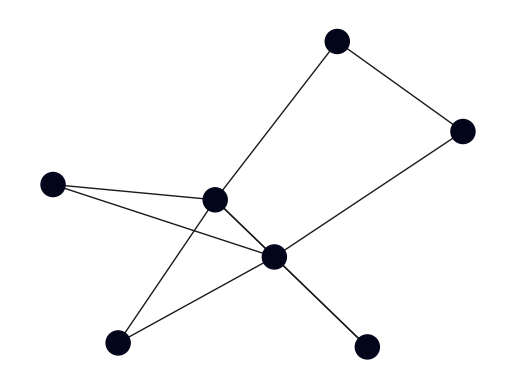

In [9]:
from graph_generation import NodeCountGraphs
nodeCountGraphs = NodeCountGraphs.NodeCountGraphs(2000)#.getDataset()
dataset = nodeCountGraphs.getDataset()

utility_functions.printGraph(dataset[0])

In [10]:
dataset = DatasetWrapper(dataset, num_cls = 2, name = "node_count")
dataset.y = dataset.y.long()
train, val = dataset.train_test_split(k=5)
model = LinearGCNClassifier(1,2,16)

In [11]:
for epoch in trange(10):
    train_loss = train.model_fit(model, lr=0.05)
    train_metrics = train.model_evaluate(model)
    val_metrics = val.model_evaluate(model)
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

 10%|█         | 1/10 [00:00<00:07,  1.28it/s]

Epoch: 000, Train Loss: 0.4045, Train Acc: 0.9231, Test Acc: 0.9125, Train F1: {0: 0.925499677658081, 1: 0.9205939173698425}, Test F1: {0: 0.9061661958694458, 1: 0.9180327653884888}


 20%|██        | 2/10 [00:01<00:04,  1.61it/s]

Epoch: 001, Train Loss: 0.1210, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 30%|███       | 3/10 [00:01<00:04,  1.72it/s]

Epoch: 002, Train Loss: 0.1016, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

Epoch: 003, Train Loss: 0.0949, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 50%|█████     | 5/10 [00:02<00:02,  1.90it/s]

Epoch: 004, Train Loss: 0.0778, Train Acc: 0.9231, Test Acc: 0.9125, Train F1: {0: 0.925499677658081, 1: 0.9205939173698425}, Test F1: {0: 0.9061661958694458, 1: 0.9180327653884888}


 60%|██████    | 6/10 [00:03<00:02,  1.92it/s]

Epoch: 005, Train Loss: 0.1031, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 70%|███████   | 7/10 [00:03<00:01,  1.94it/s]

Epoch: 006, Train Loss: 0.0557, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 80%|████████  | 8/10 [00:04<00:01,  1.96it/s]

Epoch: 007, Train Loss: 0.0757, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 90%|█████████ | 9/10 [00:04<00:00,  2.01it/s]

Epoch: 008, Train Loss: 0.0407, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

Epoch: 009, Train Loss: 0.0681, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


In [12]:
#torch.save(model.state_dict(), 'ckpts/count_lr0.05.pt')

## Multi Grid Graph Dataset

In [29]:
from graph_generation import MultiGraphs

dataset = MultiGraphs.MultiGraphs(10000, negative_class=True).getDataset()

multi_dataset = DatasetWrapper(dataset, num_cls = 4, name="multi_graph")
multi_dataset.y = multi_dataset.y.long()
multi_train, multi_val = multi_dataset.train_test_split(k=5)
multi_model = GCNClassifier(node_features=3,
                            num_classes=4,
                            hidden_channels=32,
                            num_layers=3)

Processing...
Done!


In [35]:
for epoch in trange(50):
    train_loss = multi_train.model_fit(multi_model, lr=0.01)
    train_metrics = multi_train.model_evaluate(multi_model)
    val_metrics = multi_val.model_evaluate(multi_model)
    if epoch >= 15 and train_metrics["acc"] == 1.0 and  val_metrics['acc'] == 1.0:
        print(f"epoch {epoch}")
        break
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
  2%|▏         | 1/50 [00:09<07:24,  9.07s/it]

Epoch: 000, Train Loss: 1.1897, Train Acc: 0.5286, Test Acc: 0.5340, Train F1: {0: 0.2845040559768677, 1: 0.5135512948036194, 2: 0.9917685389518738, 3: 0.0}, Test F1: {0: 0.2893258333206177, 1: 0.523542582988739, 2: 0.9920318722724915, 3: 0.0}


  4%|▍         | 2/50 [00:16<06:35,  8.25s/it]

Epoch: 001, Train Loss: 0.6681, Train Acc: 0.7270, Test Acc: 0.7250, Train F1: {0: 0.26101988554000854, 1: 0.8221994042396545, 2: 0.9987509250640869, 3: 0.62889164686203}, Test F1: {0: 0.22024866938591003, 1: 0.8250824809074402, 2: 1.0, 3: 0.6334694027900696}


  6%|▌         | 3/50 [00:23<05:56,  7.58s/it]

Epoch: 002, Train Loss: 0.3813, Train Acc: 0.7889, Test Acc: 0.7865, Train F1: {0: 0.6444540023803711, 1: 0.981354296207428, 2: 0.9957531690597534, 3: 0.5010706782341003}, Test F1: {0: 0.6496163606643677, 1: 0.9775171279907227, 2: 0.9959839582443237, 3: 0.48514851927757263}


  8%|▊         | 4/50 [00:31<05:58,  7.80s/it]

Epoch: 003, Train Loss: 0.1203, Train Acc: 0.9981, Test Acc: 0.9990, Train F1: {0: 0.9962359070777893, 1: 1.0, 2: 0.9962639808654785, 3: 1.0}, Test F1: {0: 0.9979959726333618, 1: 1.0, 2: 0.9980040192604065, 3: 1.0}


 10%|█         | 5/50 [00:38<05:36,  7.47s/it]

Epoch: 004, Train Loss: 0.0618, Train Acc: 0.9950, Test Acc: 0.9955, Train F1: {0: 0.9913259148597717, 1: 0.9994997382164001, 2: 0.9990010261535645, 3: 0.9901589751243591}, Test F1: {0: 0.9930486679077148, 1: 0.9980000257492065, 2: 1.0, 3: 0.9909365773200989}


 12%|█▏        | 6/50 [00:45<05:25,  7.39s/it]

Epoch: 005, Train Loss: 0.0202, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 14%|█▍        | 7/50 [00:52<05:09,  7.19s/it]

Epoch: 006, Train Loss: 0.0517, Train Acc: 0.9700, Test Acc: 0.9675, Train F1: {0: 0.9955000281333923, 1: 0.9581931829452515, 2: 0.9844865798950195, 3: 0.9404289126396179}, Test F1: {0: 0.9929789304733276, 1: 0.9531996250152588, 2: 0.9861932992935181, 3: 0.9363057613372803}


 16%|█▌        | 8/50 [00:59<05:02,  7.19s/it]

Epoch: 007, Train Loss: 0.0171, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 18%|█▊        | 9/50 [01:06<04:52,  7.13s/it]

Epoch: 008, Train Loss: 0.0876, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 20%|██        | 10/50 [01:13<04:40,  7.01s/it]

Epoch: 009, Train Loss: 0.0421, Train Acc: 0.9954, Test Acc: 0.9910, Train F1: {0: 1.0, 1: 0.9906636476516724, 2: 1.0, 3: 0.9908347725868225}, Test F1: {0: 1.0, 1: 0.981670081615448, 2: 1.0, 3: 0.9823182821273804}


 22%|██▏       | 11/50 [01:20<04:34,  7.05s/it]

Epoch: 010, Train Loss: 0.0263, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 24%|██▍       | 12/50 [01:28<04:31,  7.15s/it]

Epoch: 011, Train Loss: 0.0526, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 26%|██▌       | 13/50 [01:35<04:25,  7.19s/it]

Epoch: 012, Train Loss: 0.0404, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 28%|██▊       | 14/50 [01:42<04:14,  7.08s/it]

Epoch: 013, Train Loss: 0.0521, Train Acc: 0.9979, Test Acc: 0.9980, Train F1: {0: 0.9957680106163025, 1: 1.0, 2: 0.9994997382164001, 3: 0.9962359070777893}, Test F1: {0: 0.9960159659385681, 1: 1.0, 2: 1.0, 3: 0.9959839582443237}


 30%|███       | 15/50 [01:49<04:12,  7.22s/it]

Epoch: 014, Train Loss: 0.0537, Train Acc: 0.9862, Test Acc: 0.9870, Train F1: {0: 0.9908347725868225, 1: 0.9932885766029358, 2: 0.9871414303779602, 3: 0.9733059406280518}, Test F1: {0: 0.9930486679077148, 1: 0.9930209517478943, 2: 0.9861932992935181, 3: 0.9754098653793335}


 30%|███       | 15/50 [01:56<04:32,  7.78s/it]

epoch 15


In [37]:
#torch.save(multi_model.state_dict(), 'ckpts/multi_grids_lr0.05.pt')

## Grid Graphs

In [41]:
from graph_generation import GridGraphs

dataset = GridGraphs.GridGraphs(5000).getDataset()

multi_dataset = DatasetWrapper(dataset, num_cls = 2, name="grid_graphs")
multi_dataset.y = multi_dataset.y.long()
multi_train, multi_val = multi_dataset.train_test_split(k=5)
multi_model = GCNClassifier(node_features=3,
                            num_classes=2,
                            hidden_channels=16,
                            num_layers=3)

Processing...
Done!


In [42]:
for epoch in trange(50):
    train_loss = multi_train.model_fit(multi_model, lr=0.01)
    train_metrics = multi_train.model_evaluate(multi_model)
    val_metrics = multi_val.model_evaluate(multi_model)
    if epoch >= 15 and train_metrics["acc"] == 1.0 and  val_metrics['acc'] == 1.0:
        print(f"epoch {epoch}")
        break
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
  2%|▏         | 1/50 [00:04<03:35,  4.40s/it]

Epoch: 000, Train Loss: 0.5367, Train Acc: 0.8622, Test Acc: 0.8800, Train F1: {0: 0.8566970229148865, 1: 0.8673886656761169}, Test F1: {0: 0.8770492076873779, 1: 0.8828125}


  4%|▍         | 2/50 [00:07<02:59,  3.75s/it]

Epoch: 001, Train Loss: 0.1931, Train Acc: 0.9417, Test Acc: 0.9530, Train F1: {0: 0.9381470680236816, 1: 0.9449563026428223}, Test F1: {0: 0.9506820440292358, 1: 0.9551098346710205}


  6%|▌         | 3/50 [00:10<02:40,  3.42s/it]

Epoch: 002, Train Loss: 0.0560, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


  8%|▊         | 4/50 [00:13<02:29,  3.26s/it]

Epoch: 003, Train Loss: 0.0204, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 10%|█         | 5/50 [00:17<02:31,  3.36s/it]

Epoch: 004, Train Loss: 0.0348, Train Acc: 0.9992, Test Acc: 1.0000, Train F1: {0: 0.9992494583129883, 1: 0.999250590801239}, Test F1: {0: 1.0, 1: 1.0}


 12%|█▏        | 6/50 [00:20<02:27,  3.35s/it]

Epoch: 005, Train Loss: 0.0095, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 14%|█▍        | 7/50 [00:23<02:19,  3.24s/it]

Epoch: 006, Train Loss: 0.0359, Train Acc: 0.9998, Test Acc: 1.0000, Train F1: {0: 0.9997499585151672, 1: 0.9997500777244568}, Test F1: {0: 1.0, 1: 1.0}


 16%|█▌        | 8/50 [00:27<02:18,  3.29s/it]

Epoch: 007, Train Loss: 0.0119, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 18%|█▊        | 9/50 [00:30<02:15,  3.30s/it]

Epoch: 008, Train Loss: 0.0209, Train Acc: 0.9998, Test Acc: 1.0000, Train F1: {0: 0.9997499585151672, 1: 0.9997500777244568}, Test F1: {0: 1.0, 1: 1.0}


 20%|██        | 10/50 [00:34<02:19,  3.48s/it]

Epoch: 009, Train Loss: 0.0135, Train Acc: 0.9887, Test Acc: 0.9900, Train F1: {0: 0.9886220097541809, 1: 0.988875150680542}, Test F1: {0: 0.9898989796638489, 1: 0.9900990128517151}


 22%|██▏       | 11/50 [00:37<02:13,  3.43s/it]

Epoch: 010, Train Loss: 0.0107, Train Acc: 0.9998, Test Acc: 1.0000, Train F1: {0: 0.9997499585151672, 1: 0.9997500777244568}, Test F1: {0: 1.0, 1: 1.0}


 24%|██▍       | 12/50 [00:40<02:08,  3.38s/it]

Epoch: 011, Train Loss: 0.0136, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 26%|██▌       | 13/50 [00:43<02:00,  3.27s/it]

Epoch: 012, Train Loss: 0.0104, Train Acc: 0.9995, Test Acc: 1.0000, Train F1: {0: 0.9994997382164001, 1: 0.9995002746582031}, Test F1: {0: 1.0, 1: 1.0}


 28%|██▊       | 14/50 [00:46<01:54,  3.19s/it]

Epoch: 013, Train Loss: 0.0093, Train Acc: 0.9983, Test Acc: 0.9980, Train F1: {0: 0.9982469081878662, 1: 0.9982530474662781}, Test F1: {0: 0.9979959726333618, 1: 0.9980040192604065}


 30%|███       | 15/50 [00:51<02:08,  3.68s/it]

Epoch: 014, Train Loss: 0.0060, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 32%|███▏      | 16/50 [00:55<02:06,  3.71s/it]

Epoch: 015, Train Loss: 0.0099, Train Acc: 0.9995, Test Acc: 1.0000, Train F1: {0: 0.9994997382164001, 1: 0.9995002746582031}, Test F1: {0: 1.0, 1: 1.0}


 32%|███▏      | 16/50 [00:59<02:06,  3.73s/it]

epoch 16


In [43]:
torch.save(multi_model.state_dict(), 'ckpts/grids.pt')

## House Graphs

In [72]:
from graph_generation import HouseSet

dataset = HouseSet.HouseSetCreator(10000, 30, 2.5*30).getDataset()


In [91]:
dataset = DatasetWrapper(dataset, num_cls = 2, name = "houses")
dataset.y = dataset.y.long()
dataset_train, dataset_val = dataset.train_test_split(k=5)
dataset_model = GCNClassifier(node_features=3,
                            num_classes=2,
                            hidden_channels=32,
                            num_layers=3)

In [92]:
for epoch in trange(50):
    train_loss = dataset_train.model_fit(dataset_model, lr=0.01)
    train_metrics = dataset_train.model_evaluate(dataset_model)
    val_metrics = dataset_val.model_evaluate(dataset_model)
    if epoch >= 15 and train_metrics["acc"] >= 0.95 and  val_metrics['acc'] >= 0.95:
        print(f"epoch {epoch}")
        break
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  2%|▏         | 1/50 [00:07<06:04,  7.44s/it]

Epoch: 000, Train Loss: 0.2599, Train Acc: 0.9106, Test Acc: 0.9040, Train F1: {0: 0.7857356667518616, 1: 0.9435362815856934}, Test F1: {0: 0.7652812004089355, 1: 0.9396606087684631}


  4%|▍         | 2/50 [00:14<05:56,  7.44s/it]

Epoch: 001, Train Loss: 0.1943, Train Acc: 0.9365, Test Acc: 0.9275, Train F1: {0: 0.8672242760658264, 1: 0.9582717418670654}, Test F1: {0: 0.8478488922119141, 1: 0.9524121880531311}


  6%|▌         | 3/50 [00:21<05:34,  7.13s/it]

Epoch: 002, Train Loss: 0.1748, Train Acc: 0.9315, Test Acc: 0.9265, Train F1: {0: 0.8498629927635193, 1: 0.9556275010108948}, Test F1: {0: 0.836484968662262, 1: 0.9525959491729736}


  8%|▊         | 4/50 [00:28<05:21,  6.99s/it]

Epoch: 003, Train Loss: 0.1975, Train Acc: 0.9376, Test Acc: 0.9295, Train F1: {0: 0.8727365732192993, 1: 0.9586886167526245}, Test F1: {0: 0.8550873398780823, 1: 0.9534192085266113}


 10%|█         | 5/50 [00:34<05:05,  6.78s/it]

Epoch: 004, Train Loss: 0.1798, Train Acc: 0.9249, Test Acc: 0.9260, Train F1: {0: 0.8364625573158264, 1: 0.9512373208999634}, Test F1: {0: 0.8380743861198425, 1: 0.952041506767273}


 12%|█▏        | 6/50 [00:41<04:49,  6.58s/it]

Epoch: 005, Train Loss: 0.1768, Train Acc: 0.9384, Test Acc: 0.9330, Train F1: {0: 0.8696801662445068, 1: 0.9596464037895203}, Test F1: {0: 0.8568376302719116, 1: 0.9562663435935974}


 14%|█▍        | 7/50 [00:47<04:45,  6.63s/it]

Epoch: 006, Train Loss: 0.1897, Train Acc: 0.9419, Test Acc: 0.9350, Train F1: {0: 0.8804934620857239, 1: 0.961598813533783}, Test F1: {0: 0.8648648858070374, 1: 0.9572086930274963}


 16%|█▌        | 8/50 [00:53<04:32,  6.48s/it]

Epoch: 007, Train Loss: 0.1993, Train Acc: 0.9374, Test Acc: 0.9255, Train F1: {0: 0.8775959014892578, 1: 0.9579238891601562}, Test F1: {0: 0.8534906506538391, 1: 0.9500502943992615}


 18%|█▊        | 9/50 [01:00<04:25,  6.47s/it]

Epoch: 008, Train Loss: 0.1803, Train Acc: 0.9290, Test Acc: 0.9255, Train F1: {0: 0.8654028177261353, 1: 0.9517827033996582}, Test F1: {0: 0.8557599186897278, 1: 0.9497809410095215}


 20%|██        | 10/50 [01:06<04:18,  6.46s/it]

Epoch: 009, Train Loss: 0.1713, Train Acc: 0.9317, Test Acc: 0.9190, Train F1: {0: 0.8683068156242371, 1: 0.9539396166801453}, Test F1: {0: 0.8408644199371338, 1: 0.9456740617752075}


 22%|██▏       | 11/50 [01:13<04:15,  6.56s/it]

Epoch: 010, Train Loss: 0.1699, Train Acc: 0.9410, Test Acc: 0.9345, Train F1: {0: 0.8743343949317932, 1: 0.9614505171775818}, Test F1: {0: 0.8586839437484741, 1: 0.9573706388473511}


 24%|██▍       | 12/50 [01:20<04:11,  6.61s/it]

Epoch: 011, Train Loss: 0.1846, Train Acc: 0.8686, Test Acc: 0.8695, Train F1: {0: 0.7827165722846985, 1: 0.9058496952056885}, Test F1: {0: 0.7826811075210571, 1: 0.9067524075508118}


 26%|██▌       | 13/50 [01:26<04:02,  6.54s/it]

Epoch: 012, Train Loss: 0.1757, Train Acc: 0.9421, Test Acc: 0.9375, Train F1: {0: 0.8837559819221497, 1: 0.9614712595939636}, Test F1: {0: 0.8728382587432861, 1: 0.9585680961608887}


 28%|██▊       | 14/50 [01:33<03:57,  6.59s/it]

Epoch: 013, Train Loss: 0.1860, Train Acc: 0.9445, Test Acc: 0.9385, Train F1: {0: 0.8803879022598267, 1: 0.9638671875}, Test F1: {0: 0.8661588430404663, 1: 0.9600778818130493}


 30%|███       | 15/50 [01:39<03:46,  6.48s/it]

Epoch: 014, Train Loss: 0.1836, Train Acc: 0.9241, Test Acc: 0.9230, Train F1: {0: 0.8568733930587769, 1: 0.9483799934387207}, Test F1: {0: 0.8519230484962463, 1: 0.9479729533195496}


 32%|███▏      | 16/50 [01:46<03:40,  6.50s/it]

Epoch: 015, Train Loss: 0.1620, Train Acc: 0.9425, Test Acc: 0.9400, Train F1: {0: 0.8842476010322571, 1: 0.9617495536804199}, Test F1: {0: 0.8770492076873779, 1: 0.9603174328804016}


 34%|███▍      | 17/50 [01:52<03:37,  6.59s/it]

Epoch: 016, Train Loss: 0.1627, Train Acc: 0.9495, Test Acc: 0.9470, Train F1: {0: 0.8900381326675415, 1: 0.9672237634658813}, Test F1: {0: 0.8832598924636841, 1: 0.9657179713249207}


 36%|███▌      | 18/50 [01:59<03:26,  6.47s/it]

Epoch: 017, Train Loss: 0.1579, Train Acc: 0.9490, Test Acc: 0.9435, Train F1: {0: 0.8952234387397766, 1: 0.9662976861000061}, Test F1: {0: 0.8829015493392944, 1: 0.9627677202224731}


 38%|███▊      | 19/50 [02:05<03:23,  6.56s/it]

Epoch: 018, Train Loss: 0.1610, Train Acc: 0.9471, Test Acc: 0.9400, Train F1: {0: 0.8833103179931641, 1: 0.9658181667327881}, Test F1: {0: 0.8645598292350769, 1: 0.9614643454551697}


 40%|████      | 20/50 [02:12<03:19,  6.64s/it]

Epoch: 019, Train Loss: 0.1679, Train Acc: 0.9442, Test Acc: 0.9375, Train F1: {0: 0.8745076060295105, 1: 0.964165210723877}, Test F1: {0: 0.8561565279960632, 1: 0.960076630115509}


 42%|████▏     | 21/50 [02:19<03:09,  6.54s/it]

Epoch: 020, Train Loss: 0.1722, Train Acc: 0.9396, Test Acc: 0.9350, Train F1: {0: 0.8688569068908691, 1: 0.9607859253883362}, Test F1: {0: 0.8565121293067932, 1: 0.9579831957817078}


 44%|████▍     | 22/50 [02:25<03:04,  6.57s/it]

Epoch: 021, Train Loss: 0.1581, Train Acc: 0.9394, Test Acc: 0.9295, Train F1: {0: 0.8827086091041565, 1: 0.9591234922409058}, Test F1: {0: 0.8629737496376038, 1: 0.9525412321090698}


 46%|████▌     | 23/50 [02:31<02:54,  6.46s/it]

Epoch: 022, Train Loss: 0.1610, Train Acc: 0.9471, Test Acc: 0.9455, Train F1: {0: 0.8910636305809021, 1: 0.9650903940200806}, Test F1: {0: 0.8853837847709656, 1: 0.9642505645751953}


 48%|████▊     | 24/50 [02:38<02:49,  6.52s/it]

Epoch: 023, Train Loss: 0.1587, Train Acc: 0.9491, Test Acc: 0.9430, Train F1: {0: 0.8926404714584351, 1: 0.9666639566421509}, Test F1: {0: 0.8799999952316284, 1: 0.9626229405403137}


 50%|█████     | 25/50 [02:44<02:40,  6.43s/it]

Epoch: 024, Train Loss: 0.1561, Train Acc: 0.9402, Test Acc: 0.9335, Train F1: {0: 0.8829578757286072, 1: 0.9598858952522278}, Test F1: {0: 0.8679245114326477, 1: 0.9555630087852478}


 52%|█████▏    | 26/50 [02:51<02:32,  6.37s/it]

Epoch: 025, Train Loss: 0.1692, Train Acc: 0.9441, Test Acc: 0.9345, Train F1: {0: 0.8882779479026794, 1: 0.9627469182014465}, Test F1: {0: 0.8680765628814697, 1: 0.956434965133667}


 54%|█████▍    | 27/50 [02:57<02:28,  6.45s/it]

Epoch: 026, Train Loss: 0.1616, Train Acc: 0.9433, Test Acc: 0.9360, Train F1: {0: 0.8766974210739136, 1: 0.9631433486938477}, Test F1: {0: 0.8584070801734924, 1: 0.9586563110351562}


 56%|█████▌    | 28/50 [03:03<02:20,  6.39s/it]

Epoch: 027, Train Loss: 0.1481, Train Acc: 0.9444, Test Acc: 0.9400, Train F1: {0: 0.8759409189224243, 1: 0.9641504883766174}, Test F1: {0: 0.8630136847496033, 1: 0.9615877270698547}


 58%|█████▊    | 29/50 [03:11<02:18,  6.61s/it]

Epoch: 028, Train Loss: 0.1664, Train Acc: 0.9507, Test Acc: 0.9455, Train F1: {0: 0.8915795087814331, 1: 0.9681384563446045}, Test F1: {0: 0.8784838318824768, 1: 0.9648727178573608}


 60%|██████    | 30/50 [03:17<02:10,  6.52s/it]

Epoch: 029, Train Loss: 0.1622, Train Acc: 0.9445, Test Acc: 0.9445, Train F1: {0: 0.8793478012084961, 1: 0.9639610648155212}, Test F1: {0: 0.8799999952316284, 1: 0.9639024138450623}


 62%|██████▏   | 31/50 [03:23<02:03,  6.50s/it]

Epoch: 030, Train Loss: 0.1559, Train Acc: 0.9367, Test Acc: 0.9250, Train F1: {0: 0.8753080368041992, 1: 0.9576285481452942}, Test F1: {0: 0.853515625, 1: 0.9495967626571655}


 64%|██████▍   | 32/50 [03:30<01:57,  6.53s/it]

Epoch: 031, Train Loss: 0.1552, Train Acc: 0.9430, Test Acc: 0.9365, Train F1: {0: 0.8698630332946777, 1: 0.9635083079338074}, Test F1: {0: 0.8500590324401855, 1: 0.9597209095954895}


 66%|██████▌   | 33/50 [03:36<01:49,  6.43s/it]

Epoch: 032, Train Loss: 0.1698, Train Acc: 0.9479, Test Acc: 0.9360, Train F1: {0: 0.8939740657806396, 1: 0.965442955493927}, Test F1: {0: 0.8685831427574158, 1: 0.9576999545097351}


 68%|██████▊   | 34/50 [03:43<01:44,  6.51s/it]

Epoch: 033, Train Loss: 0.1574, Train Acc: 0.9480, Test Acc: 0.9460, Train F1: {0: 0.8932238221168518, 1: 0.9656311869621277}, Test F1: {0: 0.8865545988082886, 1: 0.9645669460296631}


 70%|███████   | 35/50 [03:49<01:36,  6.40s/it]

Epoch: 034, Train Loss: 0.1594, Train Acc: 0.9324, Test Acc: 0.9220, Train F1: {0: 0.8722550272941589, 1: 0.9540161490440369}, Test F1: {0: 0.853383481502533, 1: 0.946866512298584}


 72%|███████▏  | 36/50 [03:56<01:33,  6.70s/it]

Epoch: 035, Train Loss: 0.1536, Train Acc: 0.9461, Test Acc: 0.9415, Train F1: {0: 0.8779382705688477, 1: 0.9654342532157898}, Test F1: {0: 0.8644264340400696, 1: 0.9627032279968262}


 74%|███████▍  | 37/50 [04:03<01:25,  6.61s/it]

Epoch: 036, Train Loss: 0.1628, Train Acc: 0.9448, Test Acc: 0.9375, Train F1: {0: 0.8809267282485962, 1: 0.9640299677848816}, Test F1: {0: 0.8633880019187927, 1: 0.9594813585281372}


 76%|███████▌  | 38/50 [04:09<01:19,  6.60s/it]

Epoch: 037, Train Loss: 0.1546, Train Acc: 0.9486, Test Acc: 0.9445, Train F1: {0: 0.8941540122032166, 1: 0.9660807251930237}, Test F1: {0: 0.8842544555664062, 1: 0.9634988307952881}


 78%|███████▊  | 39/50 [04:16<01:14,  6.77s/it]

Epoch: 038, Train Loss: 0.1609, Train Acc: 0.9481, Test Acc: 0.9445, Train F1: {0: 0.8844333291053772, 1: 0.9665565490722656}, Test F1: {0: 0.873720109462738, 1: 0.9644345045089722}


 80%|████████  | 40/50 [04:23<01:06,  6.65s/it]

Epoch: 039, Train Loss: 0.1692, Train Acc: 0.9204, Test Acc: 0.9130, Train F1: {0: 0.8536641597747803, 1: 0.9453077912330627}, Test F1: {0: 0.8400735259056091, 1: 0.9402472376823425}


 82%|████████▏ | 41/50 [04:30<01:00,  6.69s/it]

Epoch: 040, Train Loss: 0.1520, Train Acc: 0.9473, Test Acc: 0.9435, Train F1: {0: 0.8935955762863159, 1: 0.9649326801300049}, Test F1: {0: 0.8845760822296143, 1: 0.9625951647758484}


 82%|████████▏ | 41/50 [04:37<01:00,  6.76s/it]

epoch 41


In [96]:
torch.save(dataset_model.state_dict(), 'ckpts/house.pt')